# Evasion and Poisoning Attacks on MNIST dataset


In this tutorial we show how to load the **MNIST handwritten digits dataset**
 and use it to train a Support Vector Machine (SVM).

Later we are going to perform Evasion and Poisoning attacks against the trained
 classifier, as previosuly described in [evasion](03-Evasion.ipynb) and
 [poisoning](05-Poisoning.ipynb) tutorials.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/pralab/secml/blob/HEAD/tutorials/06-MNIST_dataset.ipynb)

In [ ]:
%%capture --no-stderr --no-display
# NBVAL_IGNORE_OUTPUT

try:
  import secml
except ImportError:
  %pip install git+https://github.com/pralab/secml

## Training of the classifier

First, we load the dataset and train the classifier. For this tutorial,
 we only consider 2 digits, the 5 (five) and the 9 (nine).

In [ ]:
# NBVAL_IGNORE_OUTPUT
from secml.data.loader import CDataLoaderMNIST

# MNIST dataset will be downloaded and cached if needed
loader = CDataLoaderMNIST()

2024-11-30 09:29:45,973 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data
2024-11-30 09:29:45,973 - secml.settings - INFO - New `SECML_HOME_DIR` created: /root/secml-data


INFO:secml.settings:New `SECML_HOME_DIR` created: /root/secml-data


2024-11-30 09:29:45,982 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf
2024-11-30 09:29:45,982 - secml.settings - INFO - Default configuration file copied to: /root/secml-data/secml.conf


INFO:secml.settings:Default configuration file copied to: /root/secml-data/secml.conf


2024-11-30 09:29:45,987 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets
2024-11-30 09:29:45,987 - secml.settings - INFO - New `SECML_DS_DIR` created: /root/secml-data/datasets


INFO:secml.settings:New `SECML_DS_DIR` created: /root/secml-data/datasets


2024-11-30 09:29:45,991 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models
2024-11-30 09:29:45,991 - secml.settings - INFO - New `SECML_MODELS_DIR` created: /root/secml-data/models


INFO:secml.settings:New `SECML_MODELS_DIR` created: /root/secml-data/models


2024-11-30 09:29:45,994 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments
2024-11-30 09:29:45,994 - secml.settings - INFO - New `SECML_EXP_DIR` created: /root/secml-data/experiments


INFO:secml.settings:New `SECML_EXP_DIR` created: /root/secml-data/experiments


2024-11-30 09:29:45,999 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs
2024-11-30 09:29:45,999 - secml.settings - INFO - New `SECML_LOGS_DIR` created: /root/secml-data/logs


INFO:secml.settings:New `SECML_LOGS_DIR` created: /root/secml-data/logs


2024-11-30 09:29:46,003 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data
2024-11-30 09:29:46,003 - secml.settings - INFO - New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data


INFO:secml.settings:New `SECML_PYTORCH_DIR` created: /root/secml-data/pytorch-data



File stored in `/root/secml-data/datasets/mnist/train-images-idx3-ubyte.gz`

File stored in `/root/secml-data/datasets/mnist/train-labels-idx1-ubyte.gz`

File stored in `/root/secml-data/datasets/mnist/t10k-images-idx3-ubyte.gz`

File stored in `/root/secml-data/datasets/mnist/t10k-labels-idx1-ubyte.gz`


In [ ]:
random_state = 999

n_tr = 100  # Number of training set samples
n_val = 500  # Number of validation set samples
n_ts = 500  # Number of test set samples

digits = (5, 9)

tr_val = loader.load('training', digits=digits, num_samples=n_tr + n_val)
ts = loader.load('testing', digits=digits, num_samples=n_ts)

# Split in training and validation set
tr = tr_val[:n_tr, :]
val = tr_val[n_tr:, :]

# Normalize the features in `[0, 1]`
tr.X /= 255
val.X /= 255
ts.X /= 255

from secml.ml.classifiers import CClassifierSVM
# train SVM in the dual space, on a linear kernel, as needed for poisoning
clf = CClassifierSVM(C=10, kernel='linear')

print("Training of classifier...")
clf.fit(tr.X, tr.Y)

# Compute predictions on a test set
y_pred = clf.predict(ts.X)

# Metric to use for performance evaluation
from secml.ml.peval.metrics import CMetricAccuracy
metric = CMetricAccuracy()

# Evaluate the accuracy of the classifier
acc = metric.performance_score(y_true=ts.Y, y_pred=y_pred)

print("Accuracy on test set: {:.2%}".format(acc))

Training of classifier...
Accuracy on test set: 93.60%


Here, we Train all the classifier.
There is Something wrong with Logistic SGD

Change "loss = 'log' " to "loss = 'hinge' " in the:
('LogisticH', CClassifierSGD(regularizer='l2', loss='hinge', eta0=0.01, alpha=0.1, random_state=random_state)),
    ('LogisticL', CClassifierSGD(regularizer='l2', loss='hinge', eta0=0.01, alpha=1.0, random_state=random_state)),

In [ ]:
random_state = 999

n_tr = 100  # Number of training set samples
n_val = 500  # Number of validation set samples
n_ts = 500  # Number of test set samples

digits = (5, 9)

# Load the training and test sets
tr_val = loader.load('training', digits=digits, num_samples=n_tr + n_val)
ts = loader.load('testing', digits=digits, num_samples=n_ts)

# Split into training and validation sets
tr = tr_val[:n_tr, :]
val = tr_val[n_tr:, :]

# Normalize the features to the range [0, 1]
tr.X /= 255
val.X /= 255
ts.X /= 255

from secml.ml.classifiers import (
    CClassifierSVM, CClassifierSGD, CClassifierKNN,
    CClassifierDecisionTree, CClassifierRandomForest, CClassifierRidge, CClassifierPyTorch
)
from secml.ml.kernels import CKernelRBF
from secml.ml.peval.metrics import CMetricAccuracy
import torch.nn as nn
import torch.optim as optim

# Metric to use for performance evaluation
metric = CMetricAccuracy()

# Define models and optimizers for neural networks
NNH_model = nn.Sequential(
    nn.Linear(tr.X.shape[1], 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, len(set(tr.Y.tolist())))  # Output layer for the number of classes
)
NNH_optimizer = optim.SGD(NNH_model.parameters(), lr=0.01)

NNL_model = nn.Sequential(
    nn.Linear(tr.X.shape[1], 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, len(set(tr.Y.tolist())))  # Output layer for the number of classes
)
NNL_optimizer = optim.SGD(NNL_model.parameters(), lr=0.01, weight_decay=0.01)

# Classifier configurations
classifiers = [
    ('SVMH (Linear)', CClassifierSVM(C=100, kernel='linear')),
    ('SVML (Linear)', CClassifierSVM(C=0.01, kernel='linear')),
    ('SVM-RBFH', CClassifierSVM(C=100, kernel=CKernelRBF(gamma=0.01))),
    ('SVM-RBFL', CClassifierSVM(C=1, kernel=CKernelRBF(gamma=0.01))),
    ('LogisticH', CClassifierSGD(regularizer='l2', loss='hinge', eta0=0.01, alpha=0.1, random_state=random_state)),
    ('LogisticL', CClassifierSGD(regularizer='l2', loss='hinge', eta0=0.01, alpha=1.0, random_state=random_state)),
    ('RidgeH', CClassifierRidge(alpha=1)),
    ('RidgeL', CClassifierRidge(alpha=10)),
    ('RFH', CClassifierRandomForest(n_estimators=30, max_depth=None, random_state=random_state)),
    ('RFL', CClassifierRandomForest(n_estimators=30, max_depth=8, random_state=random_state)),
    ('NNH', CClassifierPyTorch(
        model=NNH_model,
        loss=nn.CrossEntropyLoss(),
        optimizer=NNH_optimizer,
        epochs=100,
        batch_size=32,
        random_state=random_state
    )),
    ('NNL', CClassifierPyTorch(
        model=NNL_model,
        loss=nn.CrossEntropyLoss(),
        optimizer=NNL_optimizer,
        epochs=100,
        batch_size=32,
        random_state=random_state
    )),
]

# Train and evaluate each classifier
for clf_name, clf in classifiers:
    print(f"\nTraining of {clf_name}...")
    clf.fit(tr.X, tr.Y)  # Train the classifier

    # Compute predictions on the test set
    y_pred = clf.predict(ts.X)

    # Evaluate the accuracy of the classifier
    acc = metric.performance_score(y_true=ts.Y, y_pred=y_pred)
    print(f"Accuracy of {clf_name} on test set: {acc:.2%}")



Training of SVMH (Linear)...
Accuracy of SVMH (Linear) on test set: 93.60%

Training of SVML (Linear)...
Accuracy of SVML (Linear) on test set: 94.80%

Training of SVM-RBFH...
Accuracy of SVM-RBFH on test set: 95.00%

Training of SVM-RBFL...
Accuracy of SVM-RBFL on test set: 95.00%

Training of LogisticH...
Accuracy of LogisticH on test set: 94.60%

Training of LogisticL...
Accuracy of LogisticL on test set: 93.80%

Training of RidgeH...
Accuracy of RidgeH on test set: 93.60%

Training of RidgeL...
Accuracy of RidgeL on test set: 94.60%

Training of RFH...
Accuracy of RFH on test set: 93.80%

Training of RFL...
Accuracy of RFL on test set: 93.80%

Training of NNH...
Accuracy of NNH on test set: 93.00%

Training of NNL...
Accuracy of NNL on test set: 93.40%


## Evasion attack with MNIST dataset

Let's define the attack parameters. Firstly, we chose to generate an *l2*
 perturbation within a maximum ball of radius `eps = 2.5` from the initial
 points. Secondly, we also add a low/upper bound as our feature space
 is limited in `[0, 1]`. Lastly, as we are not interested in generating
 adversarial examples for a specific class, we perform an error-generic attack
 by setting `y_target = None`.

*Please note that the attack using the MNIST dataset may take a while
 (up to a few minutes) depending on the machine the script is run on.*

In [ ]:
# For simplicity, let's attack a subset of the test set
attack_ds = ts[:25, :]

noise_type = 'l2'  # Type of perturbation 'l1' or 'l2'
dmax = 2.5  # Maximum perturbation
lb, ub = 0., 1.  # Bounds of the attack space. Can be set to `None` for unbounded
y_target = None  # None if `error-generic` or a class label for `error-specific`

# Should be chosen depending on the optimization problem
solver_params = {
    'eta': 0.5,
    'eta_min': 2.0,
    'eta_max': None,
    'max_iter': 100,
    'eps': 1e-6
}

from secml.adv.attacks import CAttackEvasionPGDLS
pgd_ls_attack = CAttackEvasionPGDLS(classifier=clf,
                                    double_init_ds=tr,
                                    distance=noise_type,
                                    dmax=dmax,
                                    solver_params=solver_params,
                                    y_target=y_target)

print("Attack started...")
eva_y_pred, _, eva_adv_ds, _ = pgd_ls_attack.run(attack_ds.X, attack_ds.Y)
print("Attack complete!")

acc = metric.performance_score(
    y_true=attack_ds.Y, y_pred=clf.predict(attack_ds.X))
acc_attack = metric.performance_score(
    y_true=attack_ds.Y, y_pred=eva_y_pred)

print("Accuracy on reduced test set before attack: {:.2%}".format(acc))
print("Accuracy on reduced test set after attack: {:.2%}".format(acc_attack))

Attack started...
Attack complete!
Accuracy on reduced test set before attack: 100.00%
Accuracy on reduced test set after attack: 12.00%


We can observe how the classifier trained on the MNIST dataset has been
 *successfully evaded* by the adversarial examples generated by our attack.

Let's now visualize few of the adversarial examples. The first row are the
 original samples and the second row are the adversarial examples. Above each
 digit it is shown the true label and the predicted label in parenthesis.

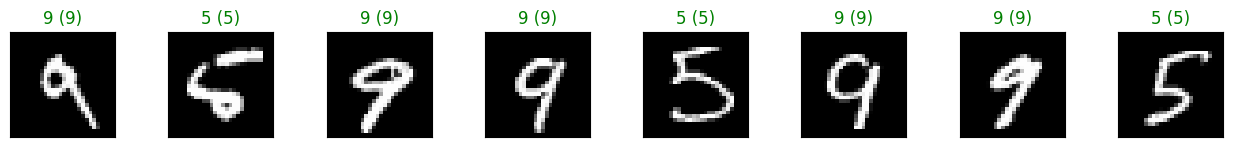

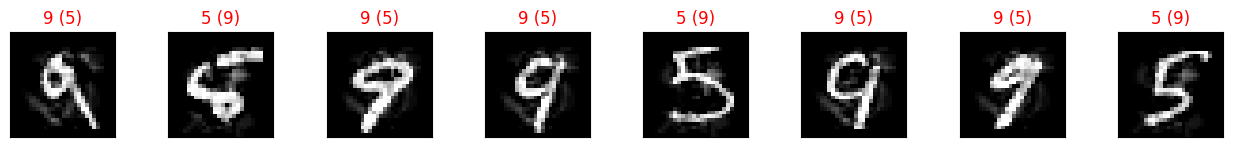

In [ ]:
from secml.figure import CFigure
# Only required for visualization in notebooks
%matplotlib inline

# Let's define a convenience function to easily plot the MNIST dataset
def show_digits(samples, preds, labels, digs, n_display=8):
    samples = samples.atleast_2d()
    n_display = min(n_display, samples.shape[0])
    fig = CFigure(width=n_display*2, height=3)
    for idx in range(n_display):
        fig.subplot(2, n_display, idx+1)
        fig.sp.xticks([])
        fig.sp.yticks([])
        fig.sp.imshow(samples[idx, :].reshape((28, 28)), cmap='gray')
        fig.sp.title("{} ({})".format(digits[labels[idx].item()], digs[preds[idx].item()]),
                     color=("green" if labels[idx].item()==preds[idx].item() else "red"))
    fig.show()

show_digits(attack_ds.X, clf.predict(attack_ds.X), attack_ds.Y, digits)
show_digits(eva_adv_ds.X, clf.predict(eva_adv_ds.X), eva_adv_ds.Y, digits)

Running Attack for each Classifier.
Here We show White-box evasion attacks on MNIST59. Test error
against increasing maximum perturbation ε.

Running attacks for SVMH (Linear)...
  Epsilon: 0.00
  Epsilon: 0.56
  Epsilon: 1.11
  Epsilon: 1.67
  Epsilon: 2.22
  Epsilon: 2.78
  Epsilon: 3.33
  Epsilon: 3.89
  Epsilon: 4.44
  Epsilon: 5.00
Running attacks for SVML (Linear)...
  Epsilon: 0.00
  Epsilon: 0.56
  Epsilon: 1.11
  Epsilon: 1.67
  Epsilon: 2.22
  Epsilon: 2.78
  Epsilon: 3.33
  Epsilon: 3.89
  Epsilon: 4.44
  Epsilon: 5.00
Running attacks for SVM-RBFH...
  Epsilon: 0.00
  Epsilon: 0.56
  Epsilon: 1.11
  Epsilon: 1.67
  Epsilon: 2.22
  Epsilon: 2.78
  Epsilon: 3.33
  Epsilon: 3.89
  Epsilon: 4.44
  Epsilon: 5.00
Running attacks for SVM-RBFL...
  Epsilon: 0.00
  Epsilon: 0.56
  Epsilon: 1.11
  Epsilon: 1.67
  Epsilon: 2.22
  Epsilon: 2.78
  Epsilon: 3.33
  Epsilon: 3.89
  Epsilon: 4.44
  Epsilon: 5.00
Running attacks for LogisticH...
  Epsilon: 0.00
  Epsilon: 0.56
  Epsilon: 1.11
  Epsilon: 1.67
  Epsilon: 2.22
  Epsilon: 2.78
  Epsilon: 3.33
  Epsilon: 3.89
  Epsilon: 4.44
  Epsilon: 5.00
Running attacks for LogisticL

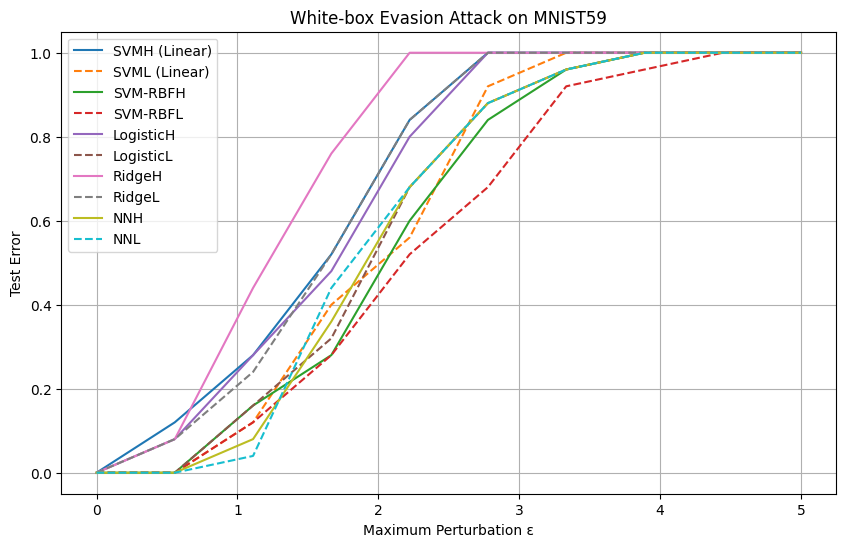

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from secml.adv.attacks import CAttackEvasionPGDLS

# Define parameters for the attack
noise_type = 'l2'  # Type of perturbation
epsilons = np.linspace(0, 5, 10)  # Maximum perturbation levels (ε)
lb, ub = 0., 1.  # Bounds of the attack space
y_target = None  # None for error-generic attacks
n_runs = 10  # Number of runs to average results

solver_params = {
    'eta': 0.5,
    'eta_min': 2.0,
    'eta_max': None,
    'max_iter': 100,
    'eps': 1e-6
}

# Initialize result storage
results = {clf_name: [] for clf_name, _ in classifiers if 'RF' not in clf_name}  # Exclude Random Forests

# Run attacks for each classifier
for clf_name, clf in classifiers:
    if 'RF' in clf_name:  # Skip random forests
        continue

    print(f"Running attacks for {clf_name}...")
    test_errors = []

    for eps in epsilons:
        print(f"  Epsilon: {eps:.2f}")
        attack_errors = []

        for _ in range(n_runs):  # Perform multiple runs for averaging
            pgd_ls_attack = CAttackEvasionPGDLS(
                classifier=clf,
                double_init_ds=tr,
                distance=noise_type,
                dmax=eps,
                solver_params=solver_params,
                y_target=y_target
            )

            # Select a subset of the test set for the attack
            attack_ds = ts[:25, :]

            # Perform the attack
            eva_y_pred, _, _, _ = pgd_ls_attack.run(attack_ds.X, attack_ds.Y)

            # Compute test error (1 - accuracy)
            acc = metric.performance_score(y_true=attack_ds.Y, y_pred=eva_y_pred)
            attack_errors.append(1 - acc)

        # Compute the mean test error for this epsilon
        mean_error = np.mean(attack_errors)
        test_errors.append(mean_error)

    results[clf_name] = test_errors

# Plotting the results
plt.figure(figsize=(10, 6))
for clf_name, errors in results.items():
    # Determine line style based on complexity (H for high complexity, L for low complexity)
    linestyle = '-' if 'H' in clf_name else '--'  # Solid line for high complexity, dotted line for low complexity
    plt.plot(epsilons, errors, label=clf_name, linestyle=linestyle)

plt.title("White-box Evasion Attack on MNIST59")
plt.xlabel("Maximum Perturbation ε")
plt.ylabel("Test Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()


## Poisoning attack with MNIST dataset

For poisoning attacks the parameters are much simpler. We set the the bounds
 of the attack space and the number of adversarial points to generate,
 50 in this example. Lastly, we chose the solver parameters for this
 specific optimization problem.

*Please note that the attack using the MNIST dataset may take a while
 (up to a few minutes) depending on the machine the script is run on.*


Attack started...
Attack complete!
Original accuracy on test set: 93.60%
Accuracy after attack on test set: 50.40%


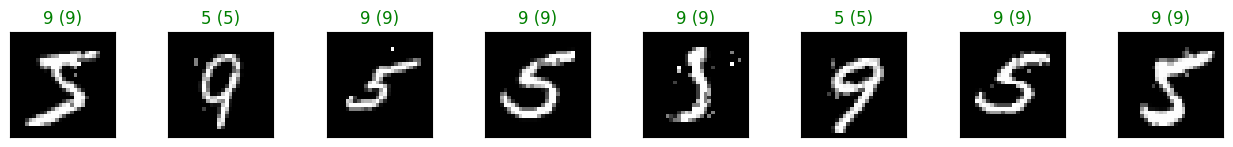

In [ ]:
lb, ub = 0., 1.  # Bounds of the attack space. Can be set to `None` for unbounded
n_poisoning_points = 15  # Number of poisoning points to generate

# Should be chosen depending on the optimization problem
solver_params = {
    'eta': 0.25,
    'eta_min': 2.0,
    'eta_max': None,
    'max_iter': 100,
    'eps': 1e-6
}

from secml.adv.attacks import CAttackPoisoningSVM
pois_attack = CAttackPoisoningSVM(classifier=clf,
                                  training_data=tr,
                                  val=val,
                                  lb=lb, ub=ub,
                                  solver_params=solver_params,
                                  random_seed=random_state)
pois_attack.n_points = n_poisoning_points

# Run the poisoning attack
print("Attack started...")
pois_y_pred, _, pois_points_ds, _ = pois_attack.run(ts.X, ts.Y)
print("Attack complete!")

# Evaluate the accuracy of the original classifier
acc = metric.performance_score(y_true=ts.Y, y_pred=clf.predict(ts.X))
# Evaluate the accuracy after the poisoning attack
pois_acc = metric.performance_score(y_true=ts.Y, y_pred=pois_y_pred)

print("Original accuracy on test set: {:.2%}".format(acc))
print("Accuracy after attack on test set: {:.2%}".format(pois_acc))

# Training of the poisoned classifier for visualization purposes
pois_clf = clf.deepcopy()
pois_tr = tr.append(pois_points_ds)  # Join the training set with the poisoning points
pois_clf.fit(pois_tr.X, pois_tr.Y)

show_digits(pois_points_ds.X, pois_clf.predict(pois_points_ds.X),
            pois_points_ds.Y, digits)

We can see that the classifier trained on the MNIST dataset has been
 successfully poisoned. To increase the attack power, more poisoning points
 can be crafted, at the expense of a much slower optimization process.

Let's note that the label of each adversarial example we show has been
 *flipped* by the attack with respect to the actual true label. Thus, the
 predicted label (parenthesis) by the poisoned classifier is displayed
 in green when *different* from the true label of the digit.

Poisoning attack for SVM classifiers

Training SVML...
Training SVMH...
Training SVM-RBFL...
Training SVM-RBFH...
Running poisoning attacks for SVML...
Running poisoning attacks for SVMH...
Running poisoning attacks for SVM-RBFL...
Running poisoning attacks for SVM-RBFH...


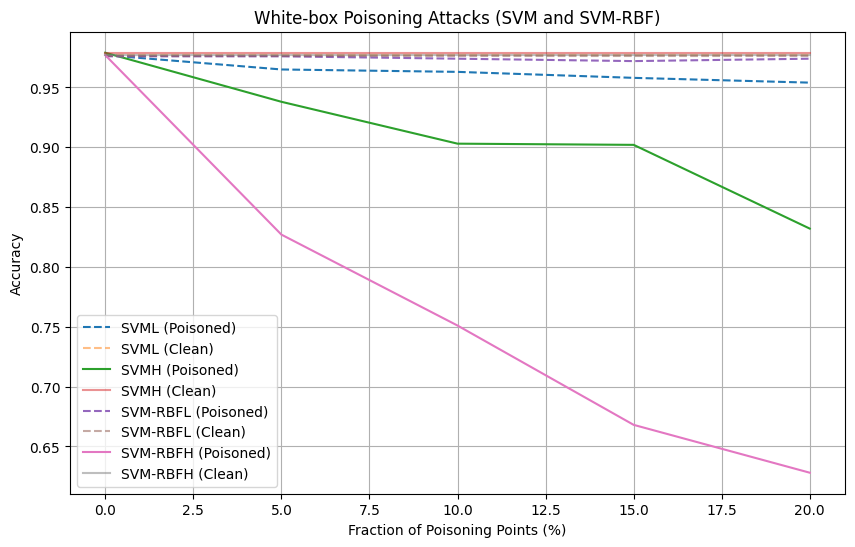

In [ ]:
import numpy as np
from secml.data.loader import CDataLoaderMNIST
from secml.data.splitter import CTrainTestSplit
from secml.ml.features import CNormalizerMinMax
from secml.ml.classifiers import CClassifierSVM
from secml.ml.kernels import CKernelRBF
from secml.ml.peval.metrics import CMetricAccuracy
from secml.adv.attacks.poisoning import CAttackPoisoningSVM
from secml.array import CArray
import matplotlib.pyplot as plt

# Step 1: Load MNIST Dataset
loader = CDataLoaderMNIST()
mnist_tr = loader.load('training')
mnist_ts = loader.load('testing')
mnist = mnist_tr.append(mnist_ts)

# Step 2: Filter Dataset for Digits 5 and 9
digit_filter = (mnist.Y == 5).logical_or(mnist.Y == 9)
mnist = mnist[digit_filter, :]

# Relabel for binary classification: 0 for 5, 1 for 9
mnist.Y[mnist.Y == 5] = 0
mnist.Y[mnist.Y == 9] = 1

# Step 3: Split Dataset
n_tr, n_val, n_ts = 500, 1000, 1000
splitter = CTrainTestSplit(train_size=n_tr + n_val, test_size=n_ts, random_state=999)
tr_val, ts = splitter.split(mnist)
splitter = CTrainTestSplit(train_size=n_tr, test_size=n_val, random_state=999)
tr, val = splitter.split(tr_val)

# Step 4: Normalize Dataset
nmz = CNormalizerMinMax()
tr.X = nmz.fit_transform(tr.X)
val.X = nmz.transform(val.X)
ts.X = nmz.transform(ts.X)

# Step 5: Define SVM and SVM-RBF Classifiers
classifiers = {
    "SVML": CClassifierSVM(kernel='linear', C=0.01),
    "SVMH": CClassifierSVM(kernel='linear', C=100),
    "SVM-RBFL": CClassifierSVM(kernel=CKernelRBF(gamma=0.01), C=1),
    "SVM-RBFH": CClassifierSVM(kernel=CKernelRBF(gamma=0.01), C=100),
}

# Train Classifiers
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    clf.fit(tr.X, tr.Y)

# Poisoning Attack Parameters
lb, ub = val.X.min(), val.X.max()
solver_params = {'eta': 0.1, 'eta_min': 0.1, 'eta_max': None, 'max_iter': 50, 'eps': 1e-4}
poisoning_fractions = np.linspace(0, 0.2, 5)  # 0%, 5%, 10%, 15%, 20%

# Step 6: Run Poisoning for SVM and SVM-RBF
results = {}
for clf_name, clf in classifiers.items():
    print(f"Running poisoning attacks for {clf_name}...")
    res = []

    for frac in poisoning_fractions:
        n_poisoning_points = int(frac * n_tr)  # Calculate number of poisoning points
        clean_acc = (clf.predict(ts.X) == ts.Y).sum() / ts.Y.size  # Accuracy without poisoning
        if n_poisoning_points == 0:
            res.append((clean_acc, clean_acc))
            continue

        # Poisoning attack for SVM classifiers
        pois_attack = CAttackPoisoningSVM(
            classifier=clf, training_data=tr, val=val, lb=lb, ub=ub, solver_params=solver_params
        )
        pois_attack.n_points = n_poisoning_points
        pois_y_pred, _, _, _ = pois_attack.run(ts.X, ts.Y)

        poisoned_acc = (pois_y_pred == ts.Y).sum() / ts.Y.size  # Accuracy after poisoning
        res.append((clean_acc, poisoned_acc))

    results[clf_name] = res

# Step 7: Plot Results
plt.figure(figsize=(10, 6))
for clf_name, acc_results in results.items():
    clean_accs, poisoned_accs = zip(*acc_results)
    linestyle = '-' if 'H' in clf_name else '--'
    plt.plot(poisoning_fractions * 100, poisoned_accs, label=f"{clf_name} (Poisoned)", linestyle=linestyle)
    plt.plot(poisoning_fractions * 100, clean_accs, label=f"{clf_name} (Clean)", linestyle=linestyle, alpha=0.5)

plt.title("White-box Poisoning Attacks (SVM and SVM-RBF)")
plt.xlabel("Fraction of Poisoning Points (%)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Plot Test Error vs Fraction of Poisoning Points for Poisoned Cases

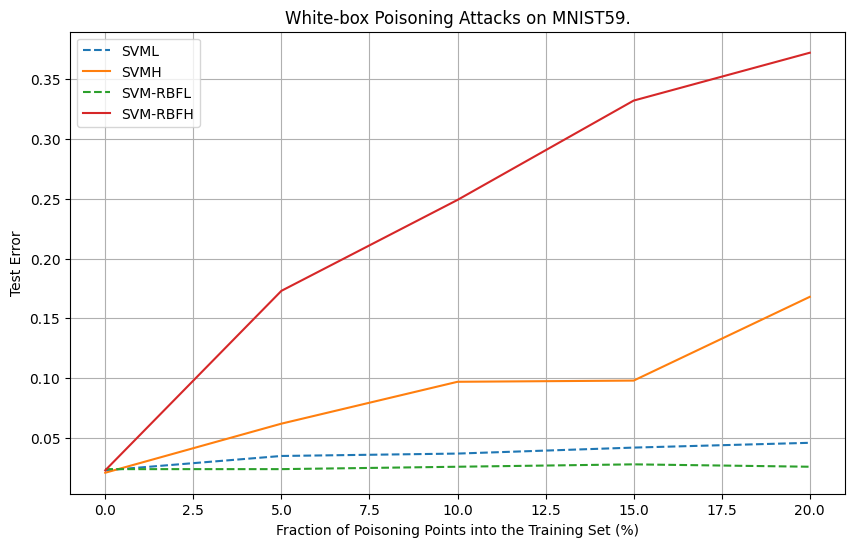

In [ ]:
# Step: Plot Test Error vs Fraction of Poisoning Points for Poisoned Cases
plt.figure(figsize=(10, 6))

# Loop through results to extract poisoned test errors
for clf_name, acc_results in results.items():
    _, poisoned_accs = zip(*acc_results)  # Extract only the poisoned accuracies
    poisoned_errors = [1 - acc for acc in poisoned_accs]  # Calculate test error (1 - accuracy)

    linestyle = '-' if 'H' in clf_name else '--'  # Solid for high complexity, dashed for low complexity
    plt.plot(poisoning_fractions * 100, poisoned_errors, label=f"{clf_name}", linestyle=linestyle)

# Customize Plot
plt.title("White-box Poisoning Attacks on MNIST59.")
plt.xlabel("Fraction of Poisoning Points into the Training Set (%)")
plt.ylabel("Test Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Poisoning attack for Logistic Regression classifier

Training logisticL...
Training logisticH...
Running poisoning attacks for logisticL...
Running poisoning attacks for logisticH...


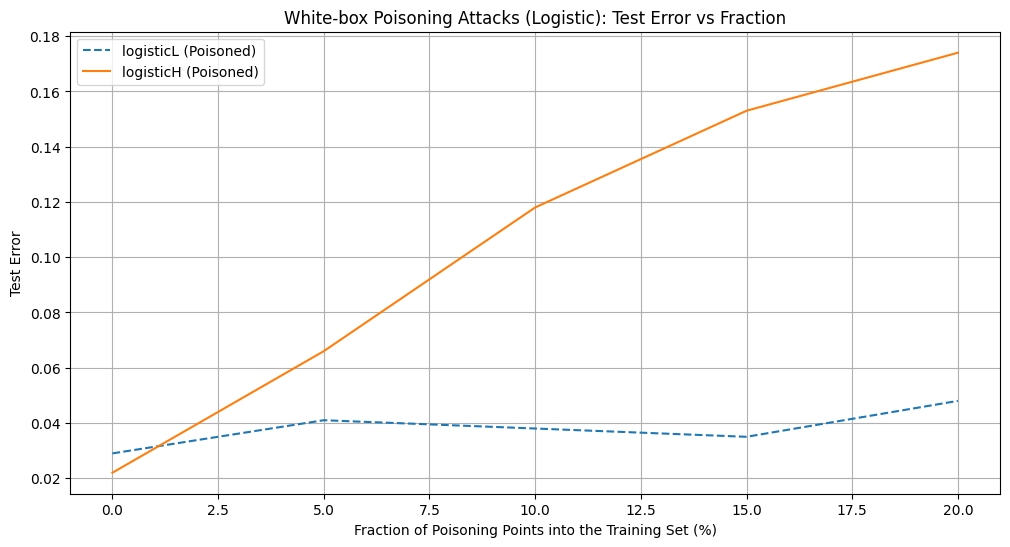

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

import numpy as np
from secml.data.loader import CDataLoaderMNIST
from secml.data.splitter import CTrainTestSplit
from secml.ml.features import CNormalizerMinMax
from secml.ml.classifiers import CClassifierLogistic
from secml.ml.peval.metrics import CMetricAccuracy
from secml.adv.attacks.poisoning import CAttackPoisoning
from secml.array import CArray
import matplotlib.pyplot as plt


# Logistic Regression Poisoning Attack
class CAttackPoisoningLogisticRegression(CAttackPoisoning):
    """Poisoning attacks against logistic regression."""
    __class_type = 'p-logistic'

    def __init__(self, classifier, training_data, val, distance='l2', dmax=0, lb=0, ub=1,
                 y_target=None, solver_type='pgd-ls', solver_params=None, init_type='random',
                 random_seed=None):
        CAttackPoisoning.__init__(self, classifier=classifier, training_data=training_data,
                                  val=val, distance=distance, dmax=dmax, lb=lb, ub=ub,
                                  y_target=y_target, solver_type=solver_type,
                                  solver_params=solver_params, init_type=init_type,
                                  random_seed=random_seed)

    def _gradient_fk_xc(self, xc, yc, clf, loss_grad, tr, k=None):
        """Gradient computation for logistic regression."""
        xc0 = xc.deepcopy()  # Keep the original poisoning point
        d = xc.size  # Number of features

        if not hasattr(clf, 'C'):
            raise ValueError("Classifier must have 'C' attribute.")

        C = clf.C  # Regularization parameter
        w = clf.w.ravel().reshape((-1, 1))  # Ensure w is a column vector
        b = clf.b  # Bias term
        grad_loss_fk = CArray(loss_grad.ravel()).T  # Gradient of the loss function

        # Validation points (xk)
        xk = self.val.X.atleast_2d()
        xc = xc if clf.preprocess is None else clf.preprocess.transform(xc)
        xc = xc.ravel().reshape((1, -1))  # Ensure xc is a 1-row matrix

        # Compute the score, sigmoid, and its derivative
        s_c = xc.dot(w) + b  # Compute score: s_c = w.T * xc + b
        sigm_c = 1 / (1 + np.exp(-yc * s_c))  # Sigmoid function
        z_c = sigm_c * (1 - sigm_c)  # Derivative of sigmoid function

        # Gradient components
        dbx_c = z_c * w  # Gradient with respect to bias
        dwx_c = ((yc * (-1 + sigm_c)) * CArray.eye(d)) + z_c * xc.T.dot(w.T)  # Gradient with respect to weights

        # Construct G matrix
        G = C * (dwx_c.append(dbx_c, axis=1))  # Append gradient with bias
        H = clf.hessian_tr_params(tr.X, tr.Y)  # Hessian
        fd_params = clf.grad_f_params(xk)
        grad_loss_params = fd_params.dot(grad_loss_fk)  # Gradient with respect to params

        # Compute the gradient in input space
        gt = self._compute_grad_inv(G, H, grad_loss_params)
        if clf.preprocess is not None:
            return clf.preprocess.gradient(xc0, w=gt)

        return gt


# Step 1: Load MNIST Dataset
loader = CDataLoaderMNIST()
mnist_tr = loader.load('training')
mnist_ts = loader.load('testing')
mnist = mnist_tr.append(mnist_ts)

# Step 2: Filter Dataset for Digits 5 and 9
digit_filter = (mnist.Y == 5).logical_or(mnist.Y == 9)
mnist = mnist[digit_filter, :]

# Relabel for binary classification: 0 for 5, 1 for 9
mnist.Y[mnist.Y == 5] = 0
mnist.Y[mnist.Y == 9] = 1

# Step 3: Split Dataset
n_tr, n_val, n_ts = 500, 1000, 1000
splitter = CTrainTestSplit(train_size=n_tr + n_val, test_size=n_ts, random_state=999)
tr_val, ts = splitter.split(mnist)
splitter = CTrainTestSplit(train_size=n_tr, test_size=n_val, random_state=999)
tr, val = splitter.split(tr_val)

# Step 4: Normalize Dataset
nmz = CNormalizerMinMax()
tr.X = nmz.fit_transform(tr.X)
val.X = nmz.transform(val.X)
ts.X = nmz.transform(ts.X)

# Step 5: Define Logistic Classifiers
classifiers = {
    "logisticL": CClassifierLogistic(C=0.01),
    "logisticH": CClassifierLogistic(C=10),
}

# Train Classifiers
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    clf.fit(tr.X, tr.Y)

# Poisoning Attack Parameters
lb, ub = val.X.min(), val.X.max()
solver_params = {'eta': 0.1, 'eta_min': 0.1, 'eta_max': None, 'max_iter': 50, 'eps': 1e-4}
poisoning_fractions = np.linspace(0, 0.2, 5)

# Step 6: Run Poisoning Attacks and Calculate Test Errors
results = {}
for clf_name, clf in classifiers.items():
    print(f"Running poisoning attacks for {clf_name}...")
    res = []

    for frac in poisoning_fractions:
        n_poisoning_points = int(frac * n_tr)
        clean_acc = (clf.predict(ts.X) == ts.Y).sum() / ts.Y.size  # Accuracy without poisoning
        clean_error = 1 - clean_acc  # Test error without poisoning

        if n_poisoning_points == 0:
            res.append((clean_error, clean_error))  # Test error remains the same
            continue

        pois_attack = CAttackPoisoningLogisticRegression(
            classifier=clf, training_data=tr, val=val, lb=lb, ub=ub,
            solver_params=solver_params
        )

        pois_attack.n_points = n_poisoning_points
        pois_y_pred, _, _, _ = pois_attack.run(ts.X, ts.Y)

        poisoned_acc = (pois_y_pred == ts.Y).sum() / ts.Y.size  # Accuracy after poisoning
        poisoned_error = 1 - poisoned_acc  # Test error after poisoning
        res.append((clean_error, poisoned_error))

    results[clf_name] = res

# Step 7: Plot Test Error
plt.figure(figsize=(12, 6))
for clf_name, error_results in results.items():
    clean_errors, poisoned_errors = zip(*error_results)  # Extract test errors
    linestyle = '-' if 'H' in clf_name else '--'
    plt.plot(poisoning_fractions * 100, poisoned_errors, label=f"{clf_name} (Poisoned)", linestyle=linestyle)

plt.title("White-box Poisoning Attacks (Logistic): Test Error vs Fraction")
plt.xlabel("Fraction of Poisoning Points into the Training Set (%)")
plt.ylabel("Test Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Here, we perform Poisoning Attack for All Classifiers and Calculate Test Errors and plot the graph

Training SVML...
Training SVMH...
Training SVM-RBFL...
Training SVM-RBFH...
Training logisticL...
Training logisticH...
Running poisoning attacks for SVML...
Running poisoning attacks for SVMH...
Running poisoning attacks for SVM-RBFL...
Running poisoning attacks for SVM-RBFH...
Running poisoning attacks for logisticL...
Running poisoning attacks for logisticH...


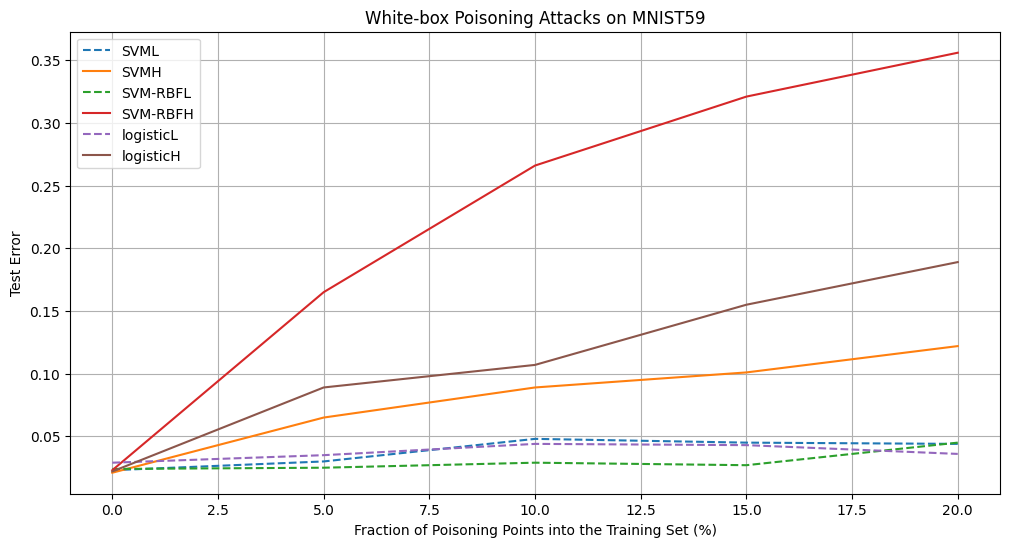

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

import numpy as np
from secml.data.loader import CDataLoaderMNIST
from secml.data.splitter import CTrainTestSplit
from secml.ml.features import CNormalizerMinMax
from secml.ml.classifiers import CClassifierSVM, CClassifierLogistic
from secml.ml.kernels import CKernelRBF
from secml.ml.peval.metrics import CMetricAccuracy
from secml.adv.attacks.poisoning import CAttackPoisoningSVM, CAttackPoisoning
from secml.array import CArray
import matplotlib.pyplot as plt

# Logistic Regression Poisoning Attack
class CAttackPoisoningLogisticRegression(CAttackPoisoning):
    """Poisoning attacks against logistic regression."""
    __class_type = 'p-logistic'

    def __init__(self, classifier, training_data, val, distance='l2', dmax=0, lb=0, ub=1,
                 y_target=None, solver_type='pgd-ls', solver_params=None, init_type='random',
                 random_seed=None):
        CAttackPoisoning.__init__(self, classifier=classifier, training_data=training_data,
                                  val=val, distance=distance, dmax=dmax, lb=lb, ub=ub,
                                  y_target=y_target, solver_type=solver_type,
                                  solver_params=solver_params, init_type=init_type,
                                  random_seed=random_seed)

    def _gradient_fk_xc(self, xc, yc, clf, loss_grad, tr, k=None):
        """Gradient computation for logistic regression."""
        xc0 = xc.deepcopy()  # Keep the original poisoning point
        d = xc.size  # Number of features

        if not hasattr(clf, 'C'):
            raise ValueError("Classifier must have 'C' attribute.")

        C = clf.C  # Regularization parameter
        w = clf.w.ravel().reshape((-1, 1))  # Ensure w is a column vector
        b = clf.b  # Bias term
        grad_loss_fk = CArray(loss_grad.ravel()).T  # Gradient of the loss function

        # Validation points (xk)
        xk = self.val.X.atleast_2d()
        xc = xc if clf.preprocess is None else clf.preprocess.transform(xc)
        xc = xc.ravel().reshape((1, -1))  # Ensure xc is a 1-row matrix

        # Compute the score, sigmoid, and its derivative
        s_c = xc.dot(w) + b  # Compute score: s_c = w.T * xc + b
        sigm_c = 1 / (1 + np.exp(-yc * s_c))  # Sigmoid function
        z_c = sigm_c * (1 - sigm_c)  # Derivative of sigmoid function

        # Gradient components
        dbx_c = z_c * w  # Gradient with respect to bias
        dwx_c = ((yc * (-1 + sigm_c)) * CArray.eye(d)) + z_c * xc.T.dot(w.T)  # Gradient with respect to weights

        # Construct G matrix
        G = C * (dwx_c.append(dbx_c, axis=1))  # Append gradient with bias
        H = clf.hessian_tr_params(tr.X, tr.Y)  # Hessian
        fd_params = clf.grad_f_params(xk)
        grad_loss_params = fd_params.dot(grad_loss_fk)  # Gradient with respect to params

        # Compute the gradient in input space
        gt = self._compute_grad_inv(G, H, grad_loss_params)
        if clf.preprocess is not None:
            return clf.preprocess.gradient(xc0, w=gt)

        return gt


# Step 1: Load MNIST Dataset
loader = CDataLoaderMNIST()
mnist_tr = loader.load('training')
mnist_ts = loader.load('testing')
mnist = mnist_tr.append(mnist_ts)

# Step 2: Filter Dataset for Digits 5 and 9
digit_filter = (mnist.Y == 5).logical_or(mnist.Y == 9)
mnist = mnist[digit_filter, :]
mnist.Y[mnist.Y == 5] = 0
mnist.Y[mnist.Y == 9] = 1

# Step 3: Split Dataset
n_tr, n_val, n_ts = 500, 1000, 1000
splitter = CTrainTestSplit(train_size=n_tr + n_val, test_size=n_ts, random_state=999)
tr_val, ts = splitter.split(mnist)
splitter = CTrainTestSplit(train_size=n_tr, test_size=n_val, random_state=999)
tr, val = splitter.split(tr_val)

# Step 4: Normalize Dataset
nmz = CNormalizerMinMax()
tr.X = nmz.fit_transform(tr.X)
val.X = nmz.transform(val.X)
ts.X = nmz.transform(ts.X)

# Step 5: Define SVM and Logistic Classifiers
classifiers = {
    "SVML": CClassifierSVM(kernel='linear', C=0.01),
    "SVMH": CClassifierSVM(kernel='linear', C=100),
    "SVM-RBFL": CClassifierSVM(kernel=CKernelRBF(gamma=0.01), C=1),
    "SVM-RBFH": CClassifierSVM(kernel=CKernelRBF(gamma=0.01), C=100),
    "logisticL": CClassifierLogistic(C=0.01),
    "logisticH": CClassifierLogistic(C=10),
}

# Train Classifiers
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    clf.fit(tr.X, tr.Y)

# Poisoning Attack Parameters
lb, ub = val.X.min(), val.X.max()
solver_params = {'eta': 0.1, 'eta_min': 0.1, 'eta_max': None, 'max_iter': 50, 'eps': 1e-4}
poisoning_fractions = np.linspace(0, 0.2, 5)  # 0%, 5%, 10%, 15%, 20%

# Step 6: Run Poisoning for All Classifiers and Calculate Test Errors
results = {}
for clf_name, clf in classifiers.items():
    print(f"Running poisoning attacks for {clf_name}...")
    res = []

    for frac in poisoning_fractions:
        n_poisoning_points = int(frac * n_tr)  # Calculate number of poisoning points
        clean_acc = (clf.predict(ts.X) == ts.Y).sum() / ts.Y.size  # Accuracy without poisoning
        clean_error = 1 - clean_acc  # Test error without poisoning

        if n_poisoning_points == 0:
            res.append((clean_error, clean_error))  # Test error remains the same
            continue

        # Select the appropriate poisoning attack based on classifier
        if "SVM" in clf_name:
            pois_attack = CAttackPoisoningSVM(
                classifier=clf, training_data=tr, val=val, lb=lb, ub=ub,
                solver_params=solver_params
            )
        elif "logistic" in clf_name:
            pois_attack = CAttackPoisoningLogisticRegression(
                classifier=clf, training_data=tr, val=val, lb=lb, ub=ub,
                solver_params=solver_params
            )

        pois_attack.n_points = n_poisoning_points
        pois_y_pred, _, _, _ = pois_attack.run(ts.X, ts.Y)

        poisoned_acc = (pois_y_pred == ts.Y).sum() / ts.Y.size  # Accuracy after poisoning
        poisoned_error = 1 - poisoned_acc  # Test error after poisoning
        res.append((clean_error, poisoned_error))

    results[clf_name] = res

# Step 7: Plot Test Error for All Classifiers
plt.figure(figsize=(12, 6))
for clf_name, error_results in results.items():
    clean_errors, poisoned_errors = zip(*error_results)  # Extract test errors
    linestyle = '-' if 'H' in clf_name else '--'
    plt.plot(poisoning_fractions * 100, poisoned_errors, label=f"{clf_name}", linestyle=linestyle)

plt.title("White-box Poisoning Attacks on MNIST59")
plt.xlabel("Fraction of Poisoning Points into the Training Set (%)")
plt.ylabel("Test Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()
